# Basic classification: Classify images of clothing

[link](https://www.tensorflow.org/tutorials/keras/classification?hl=zh-cn)

In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


# 1. Load data
https://github.com/zalandoresearch/fashion-mnist

```
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

In [88]:
def load_data():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
    # (60000, 28, 28) (60000,)
    return (train_X, train_y), (test_X, test_y)

(train_X, train_y), (test_X, test_y) = load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[9 0 0 ... 3 0 5]


In [44]:
def plotImg (index = 10):
    Img = train_X[index]
    y = train_y[index]
    print('分类:', class_names[y])
    
    plt.figure()
    plt.imshow(Img)
    plt.colorbar()
    plt.grid(False)
    plt.show()

分类: T-shirt/top


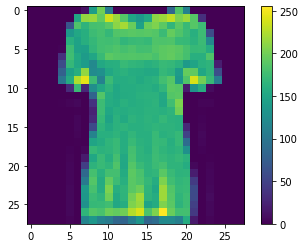

In [45]:
plotImg()

# 2. Normalization Data

In [46]:
train_X_norm = train_X / 255.0
test_X_norm = test_X / 255.0

# 3. Build Model

- tf.keras.layers.Dense

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?hl=zh-cn

In [47]:
(m, n_H, n_W) = train_X_norm.shape

"""
1. A0: 28 * 28 
2. A1: 128
3. A2: 10
"""
model = keras.Sequential([
    # features: 28 * 28 
    keras.layers.Flatten(input_shape = (n_H, n_W)),
    # 第一层数量: 128
    keras.layers.Dense(128, activation = 'relu'),
    # 最后一层数量
    keras.layers.Dense(len(class_names))
])

In [48]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [49]:
model.fit(train_X_norm, train_y, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.4972 - accuracy: 0.8257
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3765 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3354 - accuracy: 0.8781
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3111 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2942 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2806 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2698 - accuracy: 0.8998
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2559 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2474 - accuracy: 0.9077
Epoch 10/10
60

# 4. Evaluate Accuracy

In [50]:
test_loss, test_acc = model.evaluate(test_X_norm, test_y, verbose = 2)
print(test_loss)
print(test_acc)

10000/10000 - 0s - loss: 0.3490 - accuracy: 0.8811
0.34898843712210653
0.8811


# 5. SoftMax

In [54]:
# 我们已经训练的模型后面，再加一层softmax, 输出概率
softmax_model = keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
predictions = softmax_model.predict(test_X)
print(predictions)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


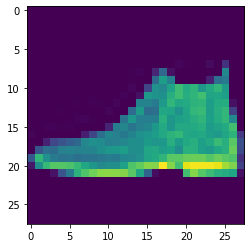

y: Ankle boot
y-index:  9
y_predict [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y_predict-index:  9
y_predict-probability:  100.0%


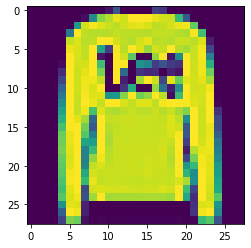

y: Pullover
y-index:  2
y_predict [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
y_predict-index:  2
y_predict-probability:  100.0%


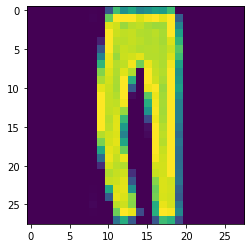

y: Trouser
y-index:  1
y_predict [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_predict-index:  1
y_predict-probability:  100.0%


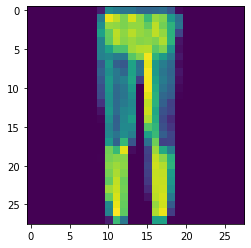

y: Trouser
y-index:  1
y_predict [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
y_predict-index:  1
y_predict-probability:  100.0%


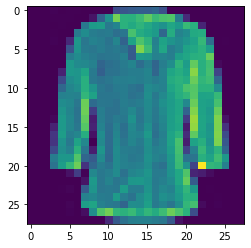

y: Shirt
y-index:  6
y_predict [2.0323348e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.9999797e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00]
y_predict-index:  6
y_predict-probability:  99.99979734420776%


In [87]:
def plot_img (i):
    y_predict = predictions[i]
    x = test_X[i]
    y = test_y[i]
    
    plt.imshow(x)
    plt.show()
    print('y:', class_names[y])
    print('y-index: ',y)
    print('y_predict', y_predict)
    print('y_predict-index: ', np.argmax(y_predict))
    print('y_predict-probability: ', str(np.max(y_predict) * 100) + '%')

for i in range(5):
    plot_img(i)